<a href="https://colab.research.google.com/github/rohankavari/DeepLearning/blob/main/10_class_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

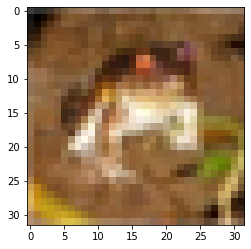

In [3]:
plt.imshow(X_train[0])

In [4]:
y_train = y_train.reshape(-1,)

In [5]:
y_test = y_test.reshape(-1,)

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8137 - accuracy: 0.3535
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6214 - accuracy: 0.4295
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5415 - accuracy: 0.4563
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4811 - accuracy: 0.4778
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4316 - accuracy: 0.4960
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3868 - accuracy: 0.5131
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3520 - accuracy: 0.5224
Epoch 8/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3166 - accuracy: 0.5389
Epoch 9/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2808 - accuracy: 0.5509
Epoch 10/100
1563/1563 [==============================] - 5s 3ms/step - l

In [10]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.65      0.66      1000
           1       0.70      0.69      0.69      1000
           2       0.48      0.50      0.49      1000
           3       0.42      0.42      0.42      1000
           4       0.52      0.51      0.52      1000
           5       0.48      0.51      0.49      1000
           6       0.65      0.62      0.64      1000
           7       0.67      0.62      0.65      1000
           8       0.66      0.74      0.70      1000
           9       0.64      0.61      0.63      1000

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000



In [16]:

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=50,validation_data=(X_test,y_test))


Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4565 - accuracy: 0.4766 - val_loss: 1.2424 - val_accuracy: 0.5574
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1132 - accuracy: 0.6119 - val_loss: 1.0585 - val_accuracy: 0.6270
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9838 - accuracy: 0.6594 - val_loss: 0.9896 - val_accuracy: 0.6553
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8966 - accuracy: 0.6880 - val_loss: 0.9986 - val_accuracy: 0.6583
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8326 - accuracy: 0.7089 - val_loss: 0.9123 - val_accuracy: 0.6877
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7761 - accuracy: 0.7317 - val_loss: 0.9201 - val_accuracy: 0.6872
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7297 - accuracy: 0.7464 - val_loss: 0.9514 - val_accuracy:

In [17]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.69      0.68      1000
           1       0.74      0.81      0.77      1000
           2       0.53      0.57      0.55      1000
           3       0.46      0.41      0.44      1000
           4       0.61      0.56      0.58      1000
           5       0.57      0.56      0.57      1000
           6       0.73      0.76      0.74      1000
           7       0.72      0.69      0.70      1000
           8       0.77      0.78      0.77      1000
           9       0.74      0.75      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.65      0.66      0.66     10000
weighted avg       0.65      0.66      0.66     10000

